['accéder', 'contenu', 'principal', 'accéder', 'recherche', 'élysée', 'homepage', 'actualités', 'agenda', 'présidence', 'écrire', 'président', 'rechercher', 'actualités', 'publié', '14', 'juillet', '2020', '14', 'juillet', 'linterview', 'président', 'emmanuel', 'macron', '20200714', '202174', 'journée', 'emmanuel', 'macron', '©', 'sdlm', 'imprimer', '’', 'issue', 'cérémonie', '14', 'juillet', 'président', 'république', 'a', 'répondu', 'question', 'léa', 'salamé', 'gilles', 'bouleau', 'france', '2', 'tf1', 'revoir', 'linterview', 'interview', 'président', 'république', 'emmanuel', 'macron', 'léa', 'salamé', 'gilles', 'bouleau', '14', 'juillet', '2020', '20', 'juillet', '2020', 'seul', 'prononcé', 'fait', 'foi', 'télécharger', 'interview', 'président', 'république', 'emmanuel', 'macron', 'léa', 'salamé', 'gilles', 'bouleau', '14', 'juillet', '2020', 'pdf', '2', 'mo', 'léa', 'salamé', 'france', '2', 'bonjour', 'tous', 'bonjour', 'monsieur', 'président', 'emmanuel', 'macron', 'bonjour', 'g

[' adequate', ' fearless', ' happy']  ok
Counter({' adequate': 1, ' fearless': 1, ' happy': 1})
Negative Sentiment


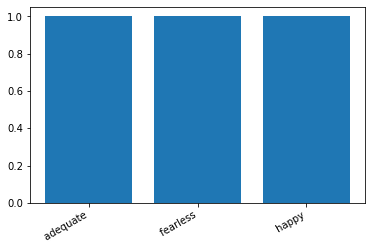

In [19]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "french")

# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('french'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)
print(lemma_words)

    
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list," ok")
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()
